# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

1. On paper uploaded seperately 

2. On paper uploaded seperately 

3. On paper uploaded seperately 

4. A non-decreasing transformation of the median is not generally the median of the transformed variable.
The median depends on the position in the ordered values, and g() can stretch or compress the spacing between values without preserving the median's position. Non-decreasing transformations generally preserve quantiles but they transform the values of those quantiles. The IQR and range is generally not preserved under non-linear transformations.

5. No, this is not always true. The mean is affected by all values in the distribution, while g(m(X)) is only a transformation of the mean. This is because the mean involves summing all values, while g(m(X)) transforms a single point.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

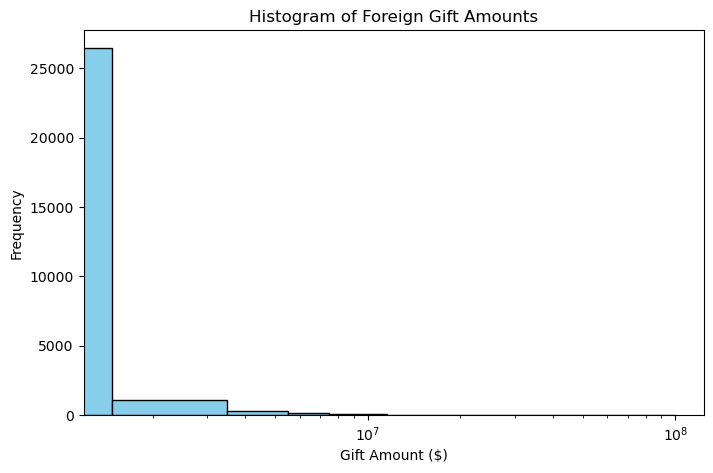

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 
# Load the dataset
df = pd.read_csv("ForeignGifts_edu.csv")

# Remove any non-numeric characters from the 'Foreign Gift Amount' column if needed
df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'], errors='coerce')

# 2. 
# Plot a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Foreign Gift Amount'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Foreign Gift Amounts')
plt.xlabel('Gift Amount ($)')
plt.ylabel('Frequency')
plt.xscale('log')  # Because gift amounts can vary widely
plt.show()

# Describe the variable
df['Foreign Gift Amount'].describe()

# The distribution is likely heavily skewed to the right (positive skew), meaning a small number of very large gifts.

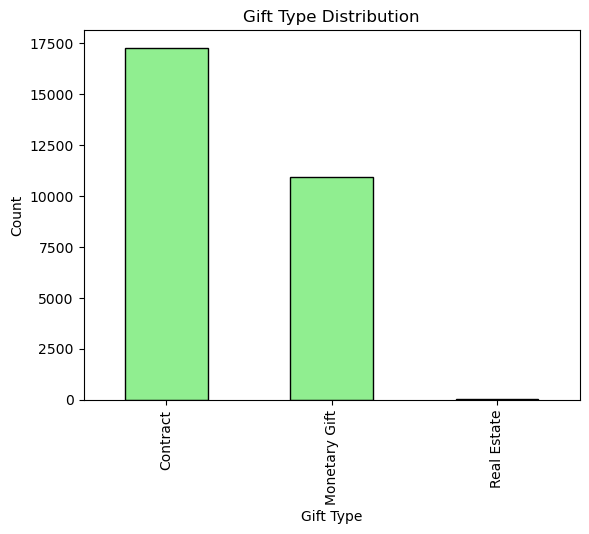

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64

In [40]:
# 3. 
# Count gift types
gift_type_counts = df['Gift Type'].value_counts()
gift_type_proportions = gift_type_counts / gift_type_counts.sum()

# Plot the counts
gift_type_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Gift Type Distribution')
plt.ylabel('Count')
plt.xlabel('Gift Type')
plt.show()

# Show the proportions
gift_type_proportions

/Users/kendalllokay/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


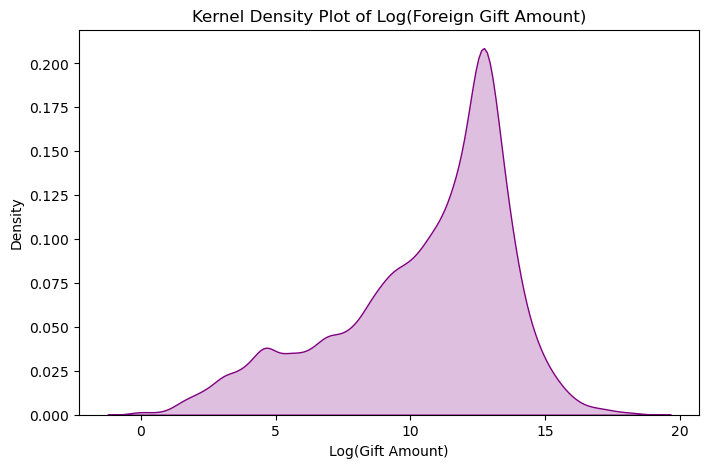

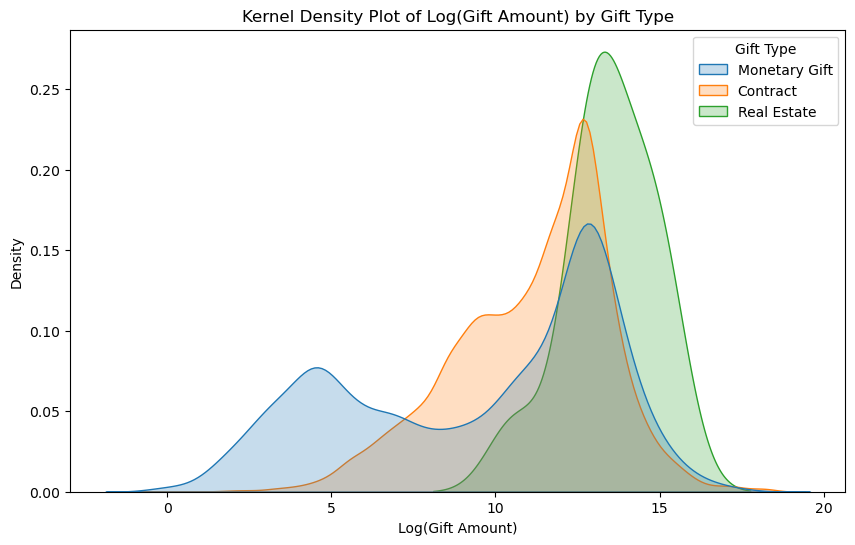

In [41]:
#4. 
# Log transform gift amounts, filter out non-positive values
df['Log Gift Amount'] = np.log(df['Foreign Gift Amount'].replace(0, np.nan))

# KDE plot for all gift amounts
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Log Gift Amount'].dropna(), fill=True, color='purple')
plt.title('Kernel Density Plot of Log(Foreign Gift Amount)')
plt.xlabel('Log(Gift Amount)')
plt.show()

# KDE plot conditional on gift type
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Log Gift Amount', hue='Gift Type', fill=True, common_norm=False)
plt.title('Kernel Density Plot of Log(Gift Amount) by Gift Type')
plt.xlabel('Log(Gift Amount)')
plt.show()

# There are more lesser value monetary gifts but more expensive real estate gifts. Gift amount around 13 goes up in density for all 3 types.

In [42]:
# 5. 
# Top 15 countries by number of gifts
top_countries_count = df['Country of Giftor'].value_counts().head(15)

# Top 15 countries by amount given
top_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

top_countries_count, top_countries_amount

(Country of Giftor
 ENGLAND            3655
 CHINA              2461
 CANADA             2344
 JAPAN              1896
 SWITZERLAND        1676
 SAUDI ARABIA       1610
 FRANCE             1437
 GERMANY            1394
 HONG KONG          1080
 SOUTH KOREA         811
 QATAR               693
 THE NETHERLANDS     512
 KOREA               452
 INDIA               434
 TAIWAN              381
 Name: count, dtype: int64,
 Country of Giftor
 QATAR                   2706240869
 ENGLAND                 1464906771
 CHINA                   1237952112
 SAUDI ARABIA            1065205930
 BERMUDA                  899593972
 CANADA                   898160656
 HONG KONG                887402529
 JAPAN                    655954776
 SWITZERLAND              619899445
 INDIA                    539556490
 GERMANY                  442475605
 UNITED ARAB EMIRATES     431396357
 FRANCE                   405839396
 SINGAPORE                401157692
 AUSTRALIA                248409202
 Name: Foreign Gift

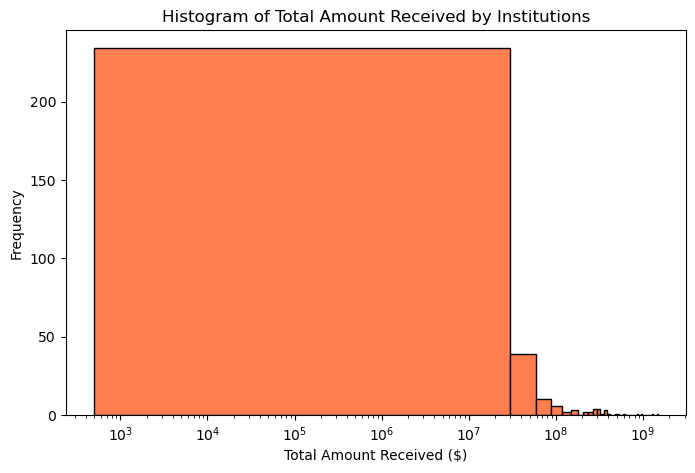

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

In [43]:
# Group by institution and sum the gift amounts
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

# Top 15 institutions by amount received
top_institutions = institution_totals.sort_values(ascending=False).head(15)

# Plot a histogram of the total amount received by all institutions
plt.figure(figsize=(8, 5))
plt.hist(institution_totals.dropna(), bins=50, color='coral', edgecolor='black')
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

top_institutions

In [44]:
# Group by giftor and sum the gift amounts
giftor_totals = df.groupby('Giftor Name')['Foreign Gift Amount'].sum()

# Top giftors by total amount given
top_giftors = giftor_totals.sort_values(ascending=False).head(15)

top_giftors

# Qatar Foundation gifted the most in total

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("airbnb_hw.csv")

# 2. 
# Inspect the data
print(df.shape)  # Dimensions of the data
print(df.columns)  # Variables included
print(df.head())  # First few rows
print(df.info())  # Data types and null values

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                 

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

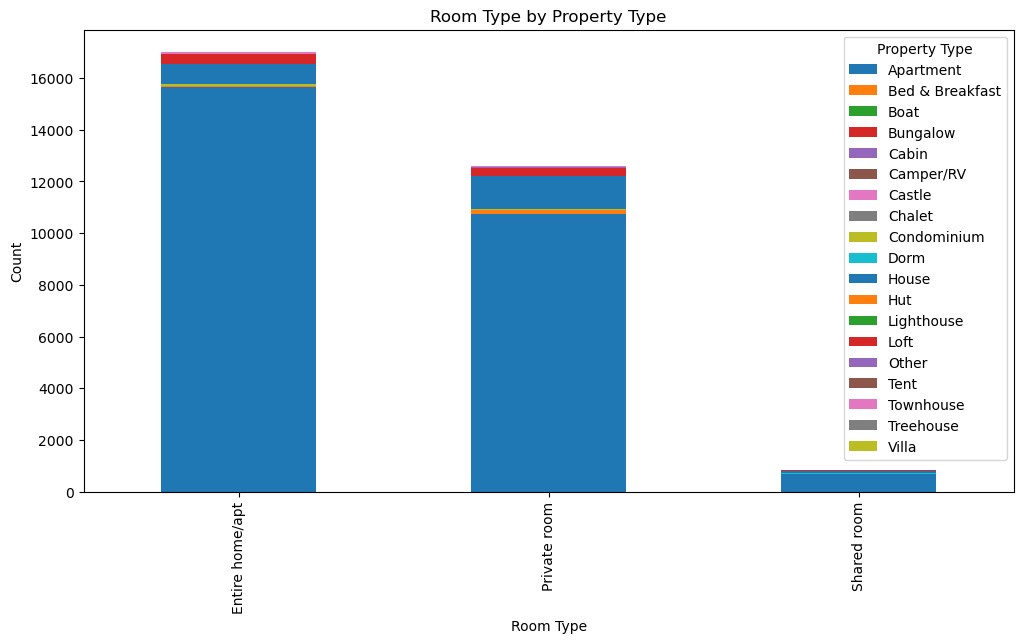

In [46]:
# 3.
cross_tab = pd.crosstab(df['Room Type'], df['Property Type'])
print(cross_tab)

# Visualize the cross-tabulation
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Room Type by Property Type')
plt.ylabel('Count')
plt.xlabel('Room Type')
plt.show()

# There are much more apartments than other types of rentals. Second to that would be houses and lofts. Shared rooms are much less common to find. It is more common to rent a private room in a house. 

In [47]:
df['Price'] = pd.to_numeric(df['Price'].replace('[\$,]', '', regex=True), errors='coerce')

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


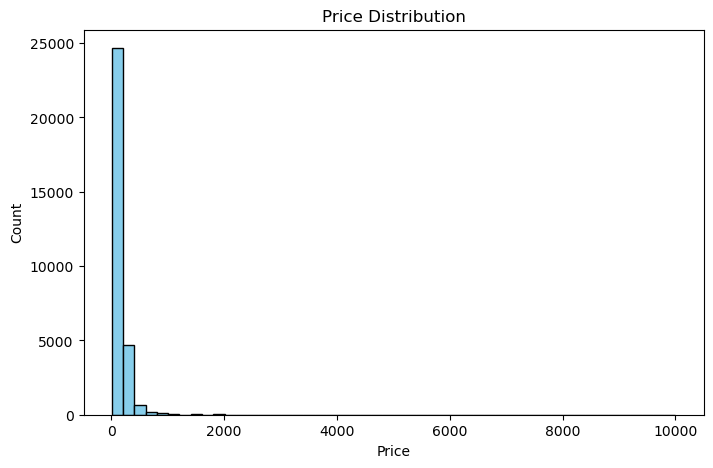

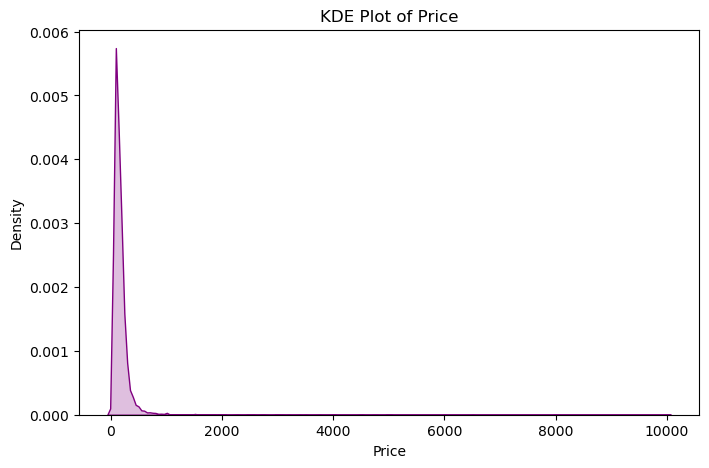

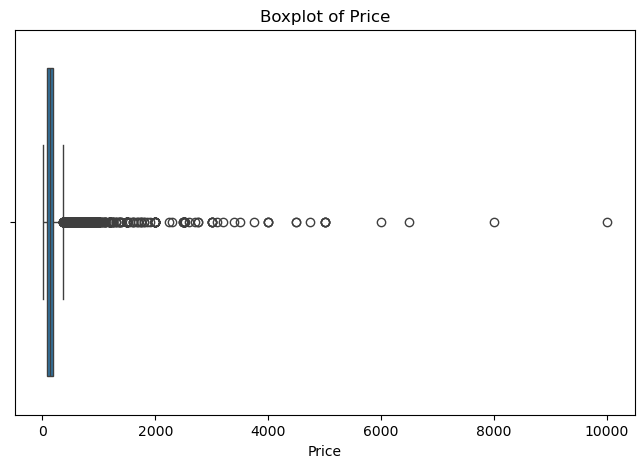

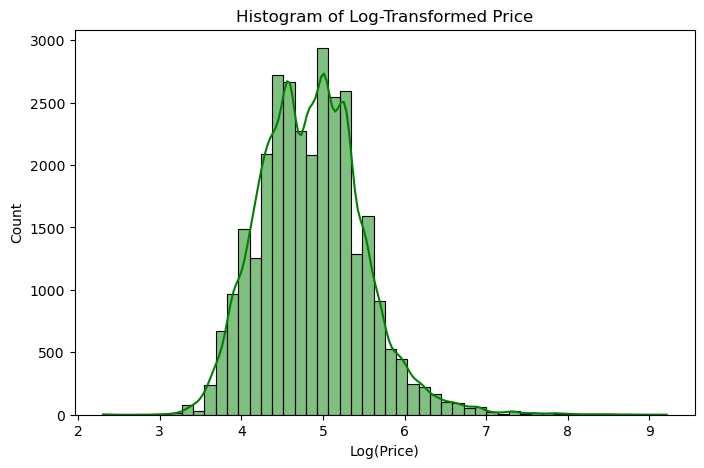

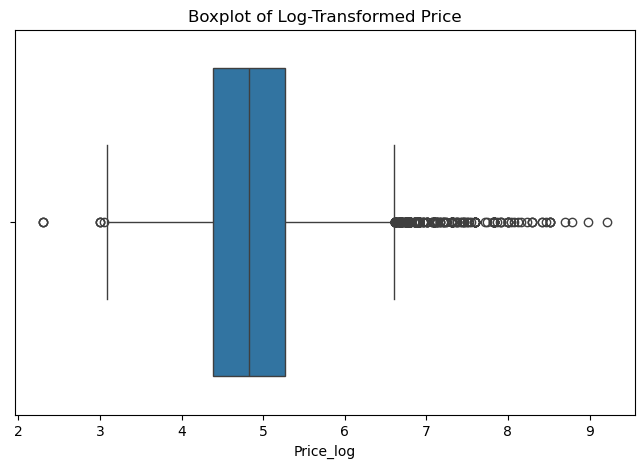

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64


In [48]:
# 4.
# Describe the Price variable
print(df['Price'].describe())

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Price'], fill=True, color='purple')
plt.title('KDE Plot of Price')
plt.xlabel('Price')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()

# Log-transform the price
df['Price_log'] = np.log(df['Price'].replace(0, np.nan))

# Repeat the steps with log-transformed price
plt.figure(figsize=(8, 5))
sns.histplot(df['Price_log'].dropna(), bins=50, kde=True, color='green')
plt.title('Histogram of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price_log'])
plt.title('Boxplot of Log-Transformed Price')
plt.show()

print(df['Price_log'].describe())

# The data is orginally badly scaled and there are outliers. This could be because luxury properties can have extremely high prices.
# The log transformation made the data look more normal.

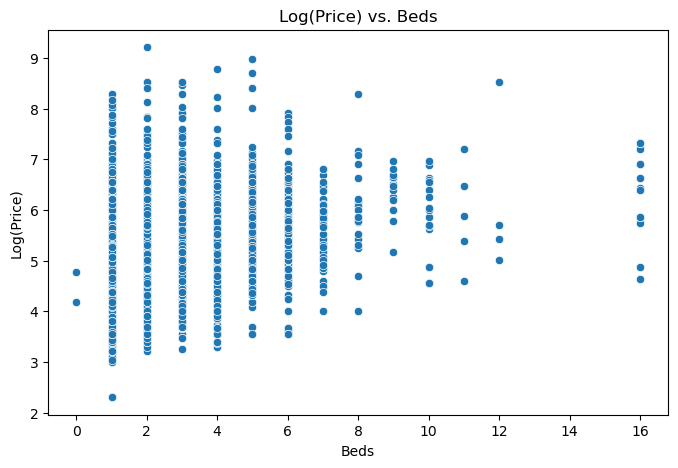

        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

In [49]:
# 5. 
# Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Beds', y='Price_log', data=df)
plt.title('Log(Price) vs. Beds')
plt.xlabel('Beds')
plt.ylabel('Log(Price)')
plt.show()

# Grouped summary
beds_summary = df.groupby('Beds')['Price'].describe()
print(beds_summary)

# There are more rentals with less beds that are cheaper. 
# More beds generally lead to higher prices, but there is considerable variation. Larger properties might occasionally be priced lower or higher than expected.


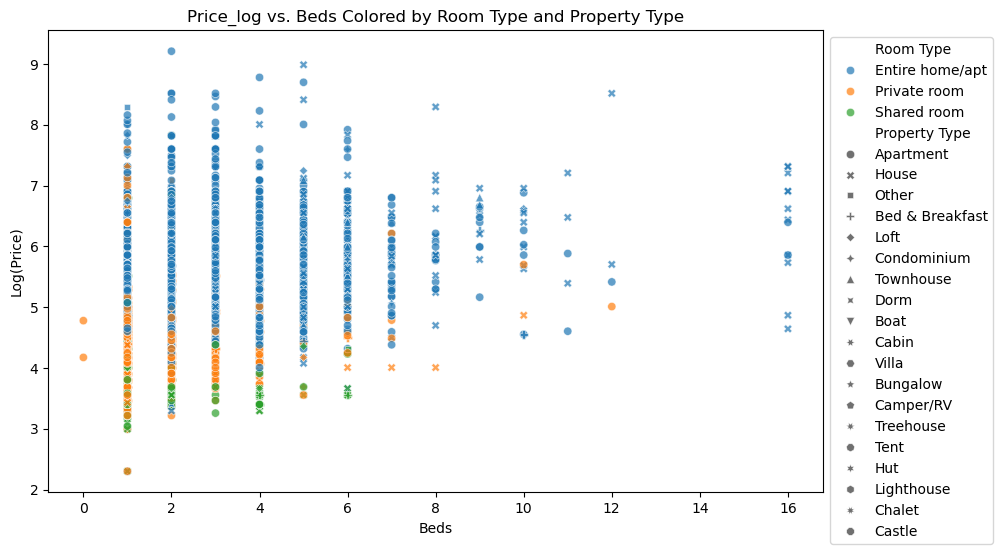

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

mean          std
Room Type       Property Type                         
Entire home/apt Other          843.428571  1133.062271
                Villa          529.750000   650.963581
                Loft           330.510204   321.519721
                Condominium    304.861111   266.197497
                House          297.263298   468.409428

In [50]:
# 6. 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Beds', y='Price_log', hue='Room Type', style='Property Type', alpha=0.7)
plt.title('Price_log vs. Beds Colored by Room Type and Property Type')
plt.xlabel('Beds')
plt.ylabel('Log(Price)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Grouped summary by Room Type and Property Type
room_property_summary = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(room_property_summary)

# Entire Homes/Apartments tend to cluster higher on the price scale, with more beds. Private Rooms generally have lower prices, with fewer beds. Shared Rooms are often very cheap.

room_property_summary[['mean', 'std']].sort_values(by='mean', ascending=False).head(5)

# Median is often more reliable than the mean when the data is skewed or has outliers, which is likely the case with Airbnb prices.


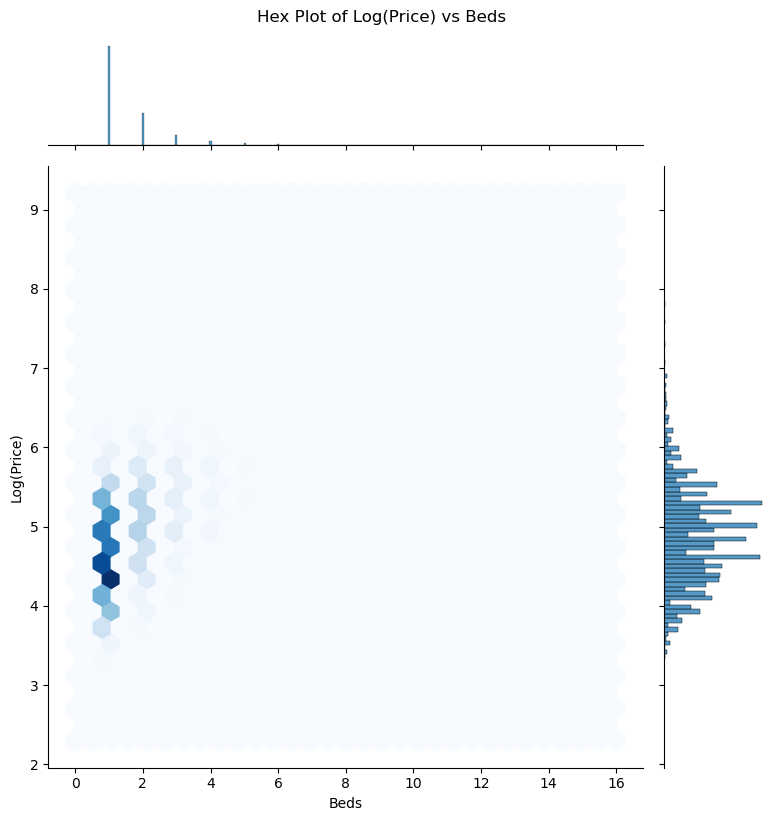

In [51]:
# 7.
sns.jointplot(data=df, x='Beds', y='Price_log', kind='hex', height=8, gridsize=30, cmap='Blues')
plt.suptitle('Hex Plot of Log(Price) vs Beds', y=1.02)
plt.xlabel('Beds')
plt.ylabel('Log(Price)')
plt.show()

# Data points are likely densely clustered around 1-3 beds with moderate prices. The hex plot better highlights density compared to scatterplots, which can sometimes be misleading due to overplotting.The majority of listings are likely smaller properties with moderate prices, while larger or luxury properties are rarer.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [52]:
import pandas as pd

# Load the data
df = pd.read_csv("drilling_rigs (1).csv")

# 623 observations, 10 variables, some variables have to be typecasted. To clean the data, these non-numeric entries were replaced with NaN values, and the affected columns were converted to numeric data types. Additionally, the Month column was converted to a datetime object using pd.to_datetime() to facilitate time series analysis. This cleaning ensured that numeric operations and visualizations could be performed accurately.

In [53]:
# 2. 
df['time'] = pd.to_datetime(df['Month'], format='mixed')

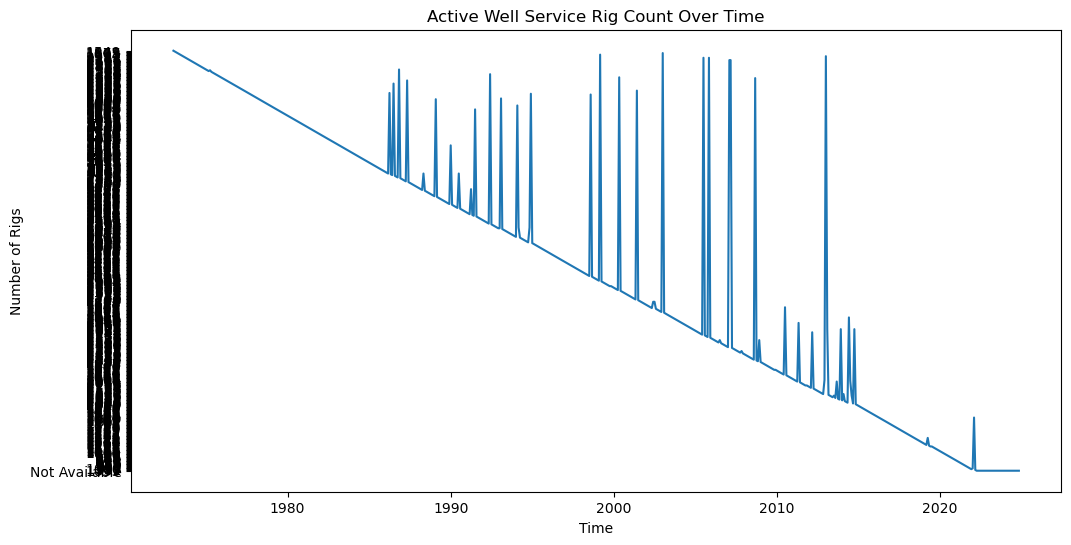

In [54]:
# 3. 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='Active Well Service Rig Count (Number of Rigs)', data=df)
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.show()

# The number of rigs decreased over time. The fluctuations over time likely reflect oil price cycles, economic recessions, and pandemic-related drops.

In [55]:
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'
)

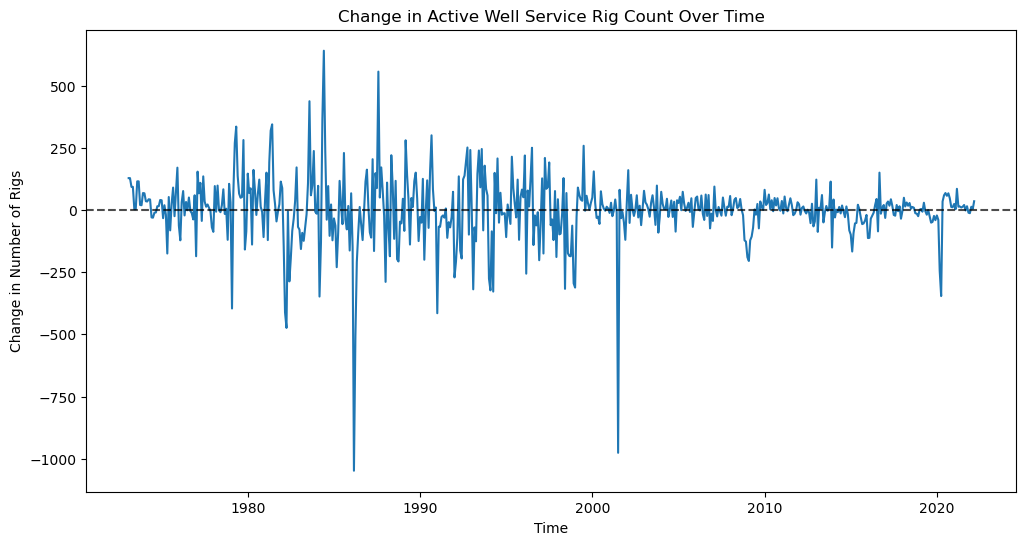

In [56]:
# 4. 
df['Rig Count Change'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='Rig Count Change', data=df)
plt.axhline(0, color='black', linestyle='--', alpha=0.7)  # Reference line at zero
plt.title('Change in Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.show()

# I can see the sudden increases and decreases and when they happened. 1987 and 2001 had large decreases. There were less rigs after 2000. 

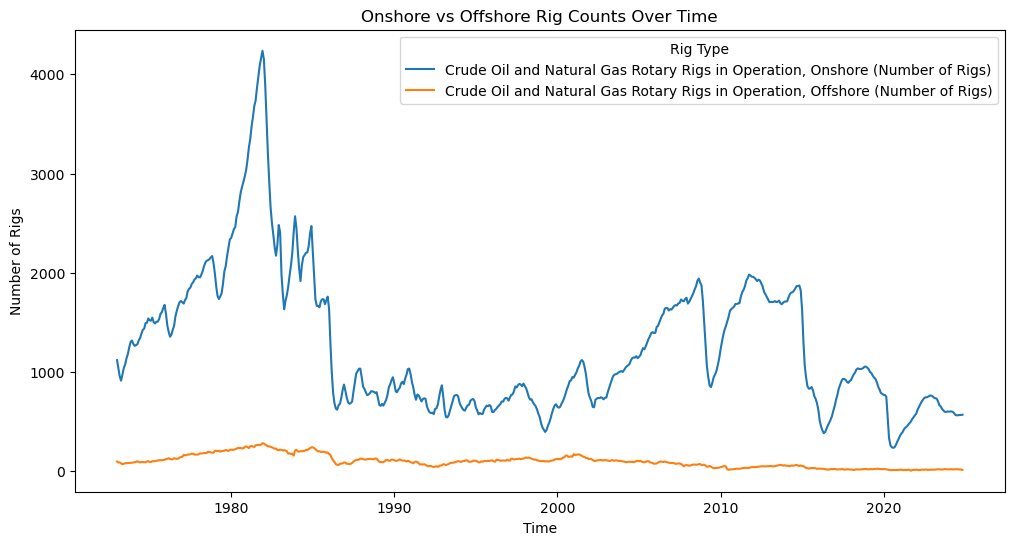

In [57]:
# 5. 
df_melted = df.melt(
    id_vars=['time'],  # Assuming you've already created `time` from `Month`
    value_vars=[
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
    ],
    var_name='Rig Type',
    value_name='Count'
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='time', y='Count', hue='Rig Type')
plt.title('Onshore vs Offshore Rig Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.legend(title='Rig Type')
plt.show()